In [1]:
pip install tensorflow opencv-python matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt



In [5]:
import cv2
import os

def video_to_frames(video_folder, output_folder, label):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    for video_filename in os.listdir(video_folder):
        video_path = os.path.join(video_folder, video_filename)
        if not os.path.isfile(video_path):
            continue
        
        cap = cv2.VideoCapture(video_path)
        count = 0
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            frame_filename = f"{label}_{os.path.splitext(video_filename)[0]}_{count}.jpg"
            frame_path = os.path.join(output_folder, frame_filename)
            cv2.imwrite(frame_path, frame)
            count += 1
        cap.release()

# Convert video frames for violence videos
video_to_frames(r'C:\Users\itzdh\Desktop\Training 25\archive\Real Life Violence Dataset\Violence', 'dataset/violence', 'violence')

# Convert video frames for non-violence videos
video_to_frames(r'C:\Users\itzdh\Desktop\Training 25\archive\Real Life Violence Dataset\NonViolence', 'dataset/non-violence', 'non-violence')



In [7]:
dataset_path = r'C:\Users\itzdh\Desktop\Training 25\dataset'
batch_size = 32
img_size = (224, 224)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)


Found 229896 images belonging to 2 classes.
Found 57473 images belonging to 2 classes.


In [11]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [13]:
epochs = 25

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator`.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs
)


Epoch 1/25


C:\Users\itzdh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


7184/7184 ━━━━━━━━━━━━━━━━━━━━ 8027s 1s/step - accuracy: 0.8795 - loss: 0.2808 - val_accuracy: 0.9149 - val_loss: 0.2187
Epoch 2/25
   1/7184 ━━━━━━━━━━━━━━━━━━━━ 1:20:36 673ms/step - accuracy: 0.9062 - loss: 0.3505

C:\Users\itzdh\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


7184/7184 ━━━━━━━━━━━━━━━━━━━━ 1s 37us/step - accuracy: 0.9062 - loss: 0.3505 - val_accuracy: 1.0000 - val_loss: 0.0148
Epoch 3/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 6340s 882ms/step - accuracy: 0.9011 - loss: 0.2404 - val_accuracy: 0.9251 - val_loss: 0.2043
Epoch 4/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 1s 37us/step - accuracy: 0.8125 - loss: 0.4796 - val_accuracy: 1.0000 - val_loss: 0.0031
Epoch 5/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 7536s 1s/step - accuracy: 0.9029 - loss: 0.2392 - val_accuracy: 0.9226 - val_loss: 0.2059
Epoch 6/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 1s 30us/step - accuracy: 0.8125 - loss: 0.4149 - val_accuracy: 1.0000 - val_loss: 0.0830
Epoch 7/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 6142s 855ms/step - accuracy: 0.9022 - loss: 0.2386 - val_accuracy: 0.9301 - val_loss: 0.1913
Epoch 8/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 1s 17us/step - accuracy: 0.9375 - loss: 0.1597 - val_accuracy: 1.0000 - val_loss: 0.0030
Epoch 9/25
7184/7184 ━━━━━━━━━━━━━━━━━━━━ 6156s 857ms/step - accuracy: 0.9004 - loss:

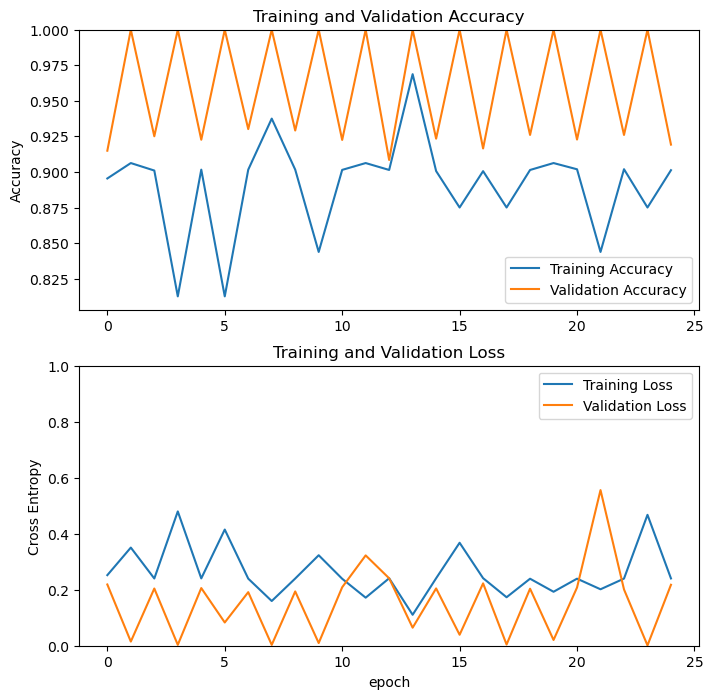

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [19]:
import tensorflow as tf

# Save the model to the path using double backslashes
model.save('C:/Users/itzdh/Desktop/Training 25/trainedmodel.h5')

